In [5]:
import numpy as np
from matplotlib import pyplot as plt
import HW2_utils_data as utils

# Question 1

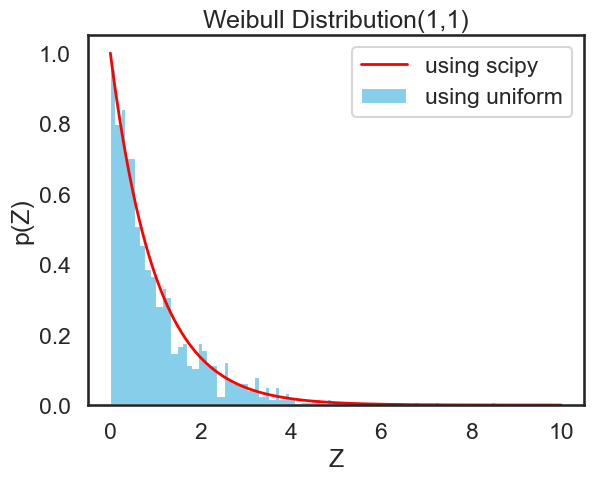

In [14]:
# Q1 1)
from scipy.stats import weibull_min
np.random.seed(0)

n = 1000
alpha = 1
beta = 1
u = np.random.rand(n)

z = (-(1/alpha)*np.log(1-u))**(1/beta)

weibull = weibull_min(beta,scale=alpha)

fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True)

x = np.linspace(0,10,1000)
ax0.plot(x, weibull.pdf(x), 'r-', lw=2, label='Weibull PDF')
ax0.hist(z, bins=75, density=True, color='skyblue',histtype='stepfilled')
ax0.set_xlabel("Z")
ax0.set_ylabel("p(Z)")
ax0.set_title("Weibull Distribution(1,1)")
ax0.legend(['using scipy', 'using uniform'])

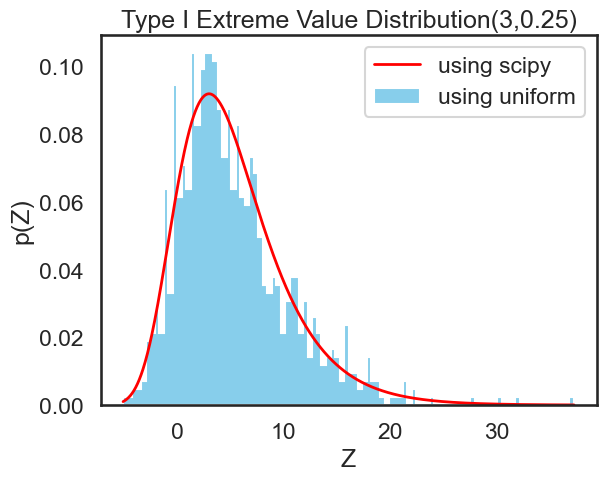

In [15]:
# Q1 2)
from scipy.stats import gumbel_r
np.random.seed(0)

n = 1000
alpha = 0.25
mu = 3
u = np.random.rand(n)

z = mu - (1/alpha)*np.log(-np.log(u))

fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True)

x = np.linspace(min(z),max(z), 1000)
ax0.plot(x, gumbel_r.pdf(x,loc=mu,scale=1/alpha), 'r-', lw=2, label='Type I Extreme Value PDF')

ax0.hist(z, bins=100, density=True, color='skyblue', histtype='stepfilled')
ax0.set_xlabel("Z")
ax0.set_ylabel("p(Z)")
ax0.set_title("Type I Extreme Value Distribution(3,0.25)")
ax0.legend(['using scipy', 'using uniform'])

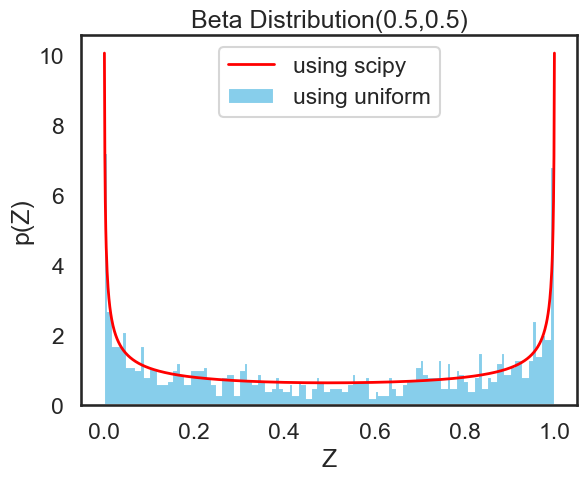

In [18]:
# Q1 3)

from scipy.stats import beta
np.random.seed(20)

n = 1000
p = 0.5
q = 0.5
u = np.random.rand(n)

z = beta.ppf(u, p, q)

x = np.linspace(0, 1, 1000)
pdf = beta.pdf(x, p, q)

fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True)

ax0.plot(x, pdf, 'r-', lw=2, label='Beta Distribution PDF')

ax0.hist(z, bins=100, density=True, color='skyblue', histtype='stepfilled')
ax0.set_xlabel("Z")
ax0.set_ylabel("p(Z)")
ax0.set_title("Beta Distribution(0.5,0.5)")
ax0.legend(['using scipy', 'using uniform'])

# Question 3

[[0.25 0.95]
 [0.95 0.55]
 [0.65 0.35]
 [0.45 0.05]
 [0.05 0.85]
 [0.35 0.45]
 [0.15 0.25]
 [0.75 0.15]
 [0.85 0.65]
 [0.55 0.75]]


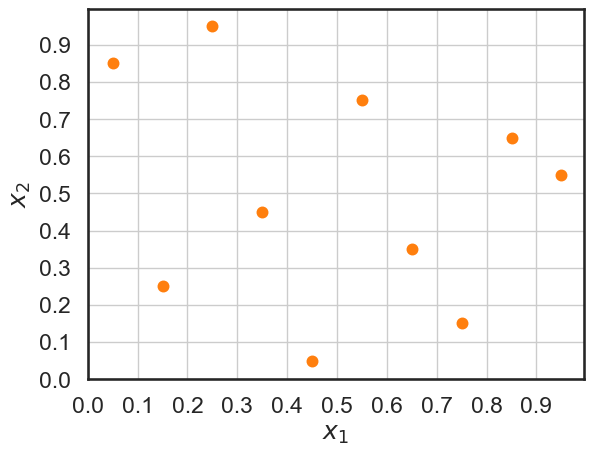

In [20]:
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
np.random.seed(1)

def latin_hypercube_sampling(N, n, a, b):
    
    lhs_samples = np.empty((N, n))
    intervals = np.linspace(a, b, N + 1)
    points = (intervals[0:N]+intervals[1:N+1])/2
    
    for i in range(n):
        lhs_samples[:,i] = np.random.permutation(points)
    
    return lhs_samples

# Example usage
N = 10
n = 2
a = 0
b = 1
lhs_sample = latin_hypercube_sampling(N, n, a, b)
print(lhs_sample)

plt.scatter(lhs_sample[:,0], lhs_sample[:,1], 50., color=sns.color_palette()[1])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xticks(np.arange(a, b, step=(b-a)/N))
plt.yticks(np.arange(a, b, step=(b-a)/N))
plt.grid(True, linewidth=1)
plt.show()

# Question 4

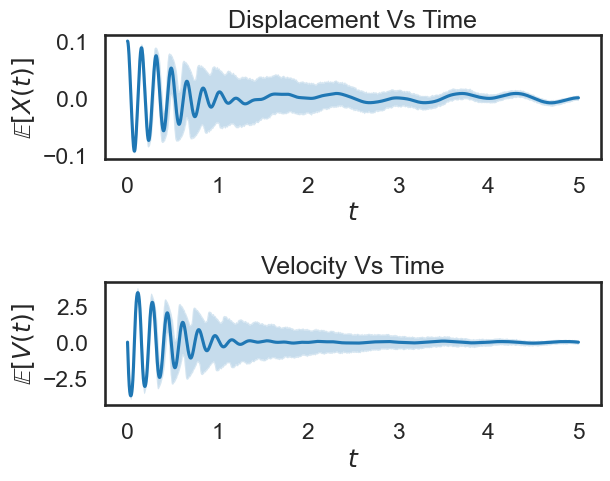

In [54]:
# Q4 1)
np.random.seed(5)
def duffing():
    # The time parameters:
    x0 = np.array([0.1, 0])         # Initial condition
    dt, t0, T = 0.0001, 0, 5        # Time discretization
    tparam = [dt, t0, T]

    k = np.random.normal(1000, 100) 
    c = np.random.normal(2, 0.5) 
    alpha = np.random.normal(100000, 2500)    # Oscillator parameters
    sysparam = [k, c, alpha]

    xt, t_eval = utils.duffing(x0, tparam, sysparam)
    return xt, t_eval

n = 1000
t = 50000
x = np.zeros(t)
v = np.zeros(t)
x2 = np.zeros(t)
v2 = np.zeros(t)
x_mc = []
v_mc = []

for i in range(n):
    y = duffing()
    x += y[0][0]
    v += y[0][1]
    x2 += x ** 2
    v2 += v ** 2
    x_mc.append(y[0][0])
    v_mc.append(y[0][1])
    
x_mc = np.array(x_mc)
v_mc = np.array(v_mc)

x_m_mc = x/n
v_m_mc = v/n

x_v_mc = x2/n - x_m_mc**2
v_v_mc = v2/n - v_m_mc**2

x_s_mc = np.sqrt(x_v_mc)
v_s_mc = np.sqrt(v_v_mc)

x_l_mc = np.percentile(x_mc, 2.5, axis=0)
x_u_mc = np.percentile(x_mc, 97.5, axis=0)
v_l_mc = np.percentile(v_mc, 2.5, axis=0)
v_u_mc = np.percentile(v_mc, 97.5, axis=0)

t_eval = duffing()[1]

plt.subplot(2,1,1)
plt.plot(t_eval, x_m_mc)
plt.fill_between(t_eval, x_l_mc, x_u_mc, alpha=0.25)
plt.xlabel('$t$')
plt.ylabel('$\mathbb{E}[X(t)]$')
plt.title('Displacement Vs Time')

plt.subplot(2,1,2)
plt.plot(t_eval, v_m_mc)
plt.fill_between(t_eval, v_l_mc, v_u_mc, alpha=0.25)
plt.xlabel('$t$')
plt.ylabel('$\mathbb{E}[V(t)]$')
plt.title('Velocity Vs Time')

plt.subplots_adjust(hspace=1)

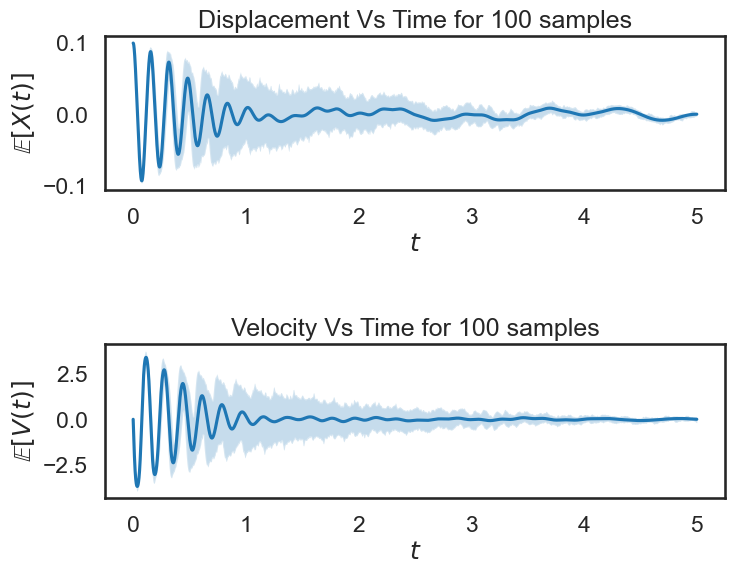

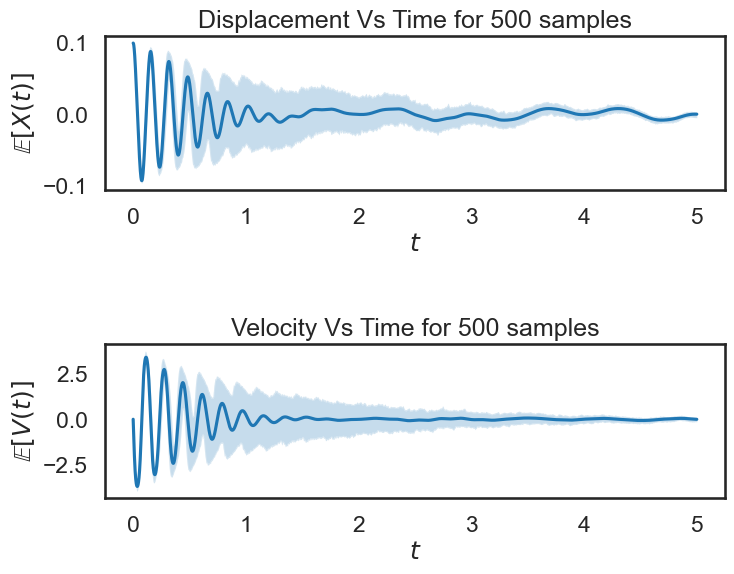

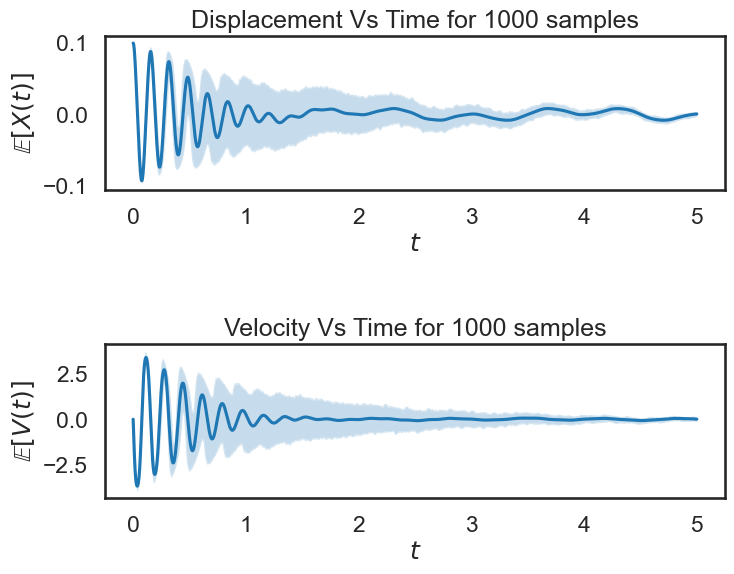

In [10]:
# Q4 3)
from scipy.stats import norm
np.random.seed(11)

def duffing_lhs(c, k, alpha):
    # The time parameters:
    x0 = np.array([0.1, 0])         # Initial condition
    dt, t0, T = 0.0001, 0, 5        # Time discretization
    tparam = [dt, t0, T]

    k = norm.ppf(k, loc=1000, scale=100) 
    c = norm.ppf(c, loc=2, scale=0.5) 
    alpha = norm.ppf(alpha, loc=100000, scale=2500)     # Oscillator parameters
    sysparam = [k, c, alpha]

    xt, t_eval = utils.duffing(x0, tparam, sysparam)
    return xt, t_eval


def lhs_duffing(n):
    
    Oscillation_params = latin_hypercube_sampling(n, 3, 0, 1)

    t = 50000
    x = np.zeros(t)
    v = np.zeros(t)
    x2 = np.zeros(t)
    v2 = np.zeros(t)
    x_mc = []
    v_mc = []

    for i in range(n):
        y = duffing_lhs(Oscillation_params[i][0], Oscillation_params[i][1], Oscillation_params[i][2])
        x += y[0][0]
        v += y[0][1]
        x2 += x ** 2
        v2 += v ** 2
        x_mc.append(y[0][0])
        v_mc.append(y[0][1])
        
    x_mc = np.array(x_mc)
    v_mc = np.array(v_mc)

    x_m_mc = x/n
    v_m_mc = v/n

    x_v_mc = x2/n - x_m_mc**2
    v_v_mc = v2/n - v_m_mc**2

    x_s_mc = np.sqrt(x_v_mc)
    v_s_mc = np.sqrt(v_v_mc)

    x_l_mc = np.percentile(x_mc, 2.5, axis=0)
    x_u_mc = np.percentile(x_mc, 97.5, axis=0)
    v_l_mc = np.percentile(v_mc, 2.5, axis=0)
    v_u_mc = np.percentile(v_mc, 97.5, axis=0)

    t_eval = duffing_lhs(Oscillation_params[0][0], Oscillation_params[0][1], Oscillation_params[0][2])[1]

    fig, axs = plt.subplots(2, figsize=(8, 6))
    
    axs[0].plot(t_eval, x_m_mc)
    axs[0].fill_between(t_eval, x_l_mc, x_u_mc, alpha=0.25)
    axs[0].set_xlabel('$t$')
    axs[0].set_ylabel('$\mathbb{E}[X(t)]$')
    axs[0].set_title('Displacement Vs Time for {} samples'.format(n))

    axs[1].plot(t_eval, v_m_mc)
    axs[1].fill_between(t_eval, v_l_mc, v_u_mc, alpha=0.25)
    axs[1].set_xlabel('$t$')
    axs[1].set_ylabel('$\mathbb{E}[V(t)]$')
    axs[1].set_title('Velocity Vs Time for {} samples'.format(n))

    plt.subplots_adjust(hspace=1)
    
N = [100, 500, 1000]
for num in N:
    lhs_duffing(num)

# Question 5

c:\Users\Lenovo\OneDrive - IIT Delhi\SEM-6\APL747\ASSIGNMENTS\Homework 2\HW2_utils_data.py:44: RuntimeWarning: overflow encountered in multiply
  fun_handle = lambda us: us * FiniteDiff(us, Dx, d=1)
c:\Users\Lenovo\OneDrive - IIT Delhi\SEM-6\APL747\ASSIGNMENTS\Homework 2\HW2_utils_data.py:58: RuntimeWarning: invalid value encountered in multiply
  uh_new = EE * (uh + Dt * fhu)   # semi-implicit Euler step


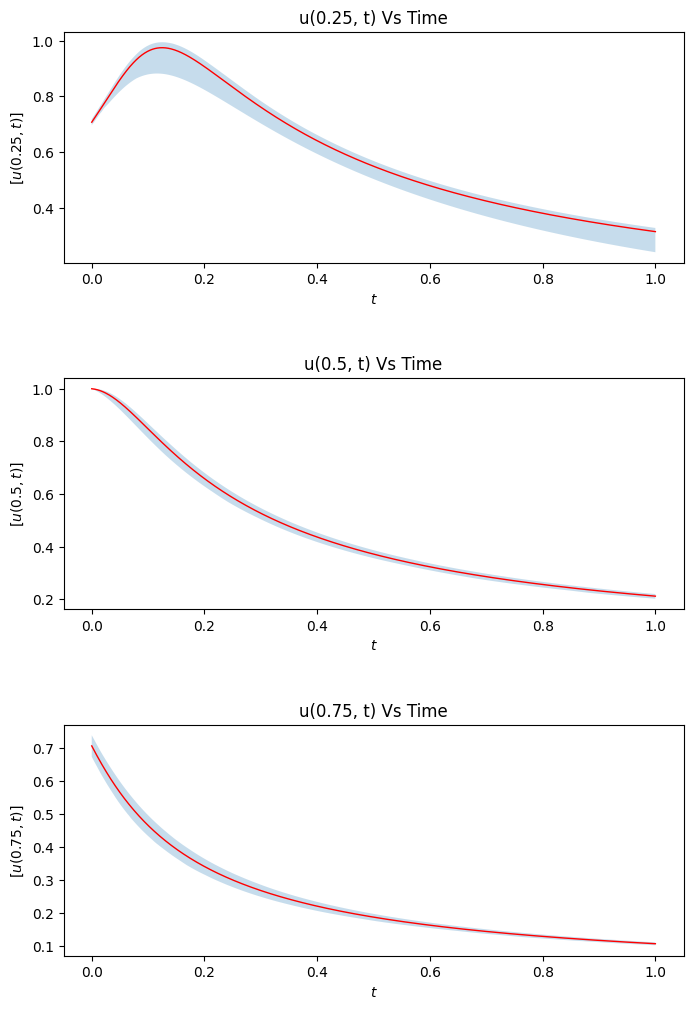

In [3]:
# Q5 1)
np.random.seed(3)

def burgers():
    T = 1               # Total time of integration
    dt = 0.001          # Time step
    N = int(T/dt)       # No of time points
    a = 1               # Length of space
    J = 256             # Space discretization points
    epsilon = 0.01/(np.random.normal(np.pi, 2*np.pi/4))                # viscosity

    x = np.arange(-a,a,2*a/J)           # Discretization points
    # u0 = np.sin(np.pi*x)                # Initial condition
    u0 = np.sin(np.random.normal(np.pi, 2*0.005*np.pi)*x)
    # u0 = utils.grf(x)                   # For random field

    ut, t = utils.pde_oned_Galerkin(u0, T, a, N, J, epsilon)
    
    return ut, t

n = 1000
t = 1001
l = 256
u = np.zeros((l,t))
u2 = np.zeros((l,t))
u_mc = []

i = 0
while i < n:
    y = burgers()
    if np.any(np.isnan(y[0])):
        continue
    u += y[0]
    u2 += u ** 2
    u_mc.append(y[0])
    i += 1
    
u_mc = np.array(u_mc)
u_m_mc = u/n
u_v_mc = u2/n - u_m_mc**2
u_s_mc = np.sqrt(u_v_mc)

t_eval = burgers()[1]
t_eval = np.concatenate((t_eval, [1]), axis=None)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
# I(x = 0.25)
u_l_mc = np.percentile(u_mc[:,160,:], 2.5, axis=0)
u_u_mc = np.percentile(u_mc[:,160,:], 97.5, axis=0)

axs[0].plot(t_eval, u_m_mc[160], color='red', linewidth=1)
axs[0].fill_between(t_eval, u_l_mc, u_u_mc, alpha=0.25)
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$[u(0.25, t)]$')
axs[0].set_title('u(0.25, t) Vs Time')

# II(x = 0.5)
u_l_mc = np.percentile(u_mc[:,192,:], 2.5, axis=0)
u_u_mc = np.percentile(u_mc[:,192,:], 97.5, axis=0)

axs[1].plot(t_eval, u_m_mc[192], color='red', linewidth=1)
axs[1].fill_between(t_eval, u_l_mc, u_u_mc, alpha=0.25)
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$[u(0.5, t)]$')
axs[1].set_title('u(0.5, t) Vs Time')

# I(x = 0.75)
u_l_mc = np.percentile(u_mc[:,224,:], 2.5, axis=0)
u_u_mc = np.percentile(u_mc[:,224,:], 97.5, axis=0)

axs[2].plot(t_eval, u_m_mc[224], color='red', linewidth=1)
axs[2].fill_between(t_eval, u_l_mc, u_u_mc, alpha=0.25)
axs[2].set_xlabel('$t$')
axs[2].set_ylabel('$[u(0.75, t)]$')
axs[2].set_title('u(0.75, t) Vs Time')

plt.subplots_adjust(hspace=0.5)

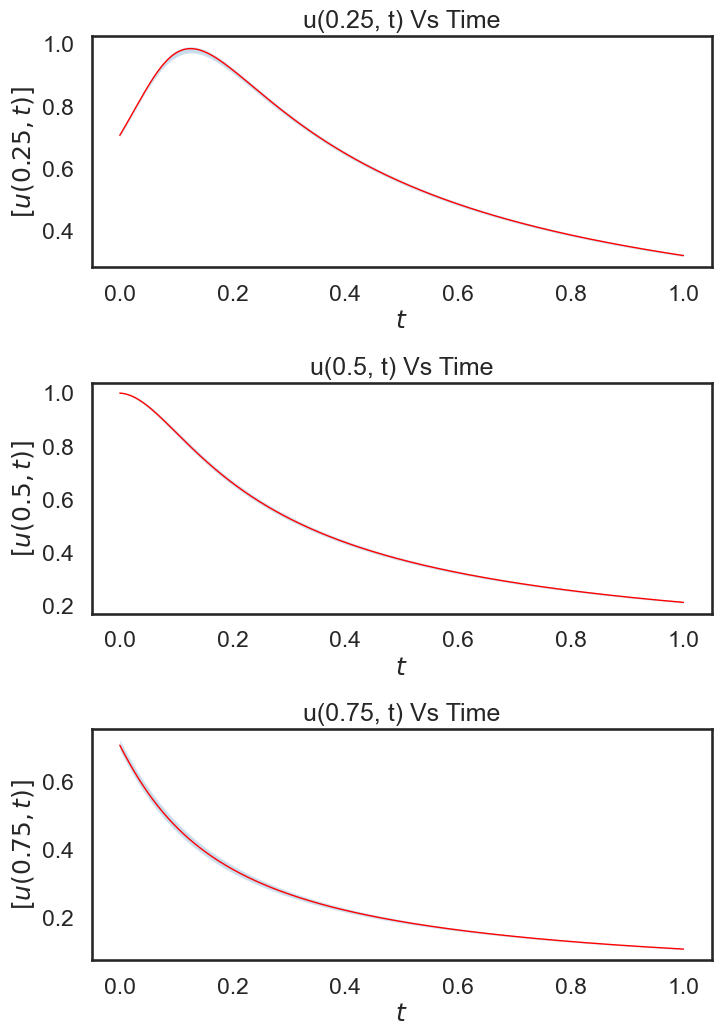

In [13]:
# Q5 3)
np.random.seed(15)

def lhs_burgers(epsilon, eta):
    T = 1               # Total time of integration
    dt = 0.001          # Time step
    N = int(T/dt)       # No of time points
    a = 1               # Length of space
    J = 256             # Space discretization points
    epsilon = 0.01/norm.ppf(epsilon, loc=np.pi, scale=0.25*np.pi)                # viscosity

    x = np.arange(-a,a,2*a/J)           # Discretization points
    # u0 = np.sin(np.pi*x)                # Initial condition
    eta = norm.ppf(eta, loc=np.pi, scale=0.005*np.pi)
    u0 = np.sin(eta*x)
    # u0 = utils.grf(x)                   # For random field

    ut, t = utils.pde_oned_Galerkin(u0, T, a, N, J, epsilon)
    
    return ut, t

n = 500
params = latin_hypercube_sampling(int(1.5*n), 2, 0, 1)
t = 1001
l = 256
u = np.zeros((l,t))
u2 = np.zeros((l,t))
u_mc = [] 

i, j = 0, 0
while i < n:
    y = lhs_burgers(params[j][0], params[j][1])
    j += 1
    if np.any(np.isnan(y[0])):
        continue
    u += y[0]
    u2 += u ** 2
    u_mc.append(y[0])
    i += 1
    
u_mc = np.array(u_mc)
u_m_mc = u/n
u_v_mc = u2/n - u_m_mc**2
u_s_mc = np.sqrt(u_v_mc)

t_eval = burgers()[1]
t_eval = np.concatenate((t_eval, [1]), axis=None)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
# I(x = 0.25)
u_l_mc = np.percentile(u_mc[:,160,:], 2.5, axis=0)
u_u_mc = np.percentile(u_mc[:,160,:], 97.5, axis=0)

axs[0].plot(t_eval, u_m_mc[160], color='red', linewidth=1)
axs[0].fill_between(t_eval, u_l_mc, u_u_mc, alpha=0.25)
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$[u(0.25, t)]$')
axs[0].set_title('u(0.25, t) Vs Time')

# II(x = 0.5)
u_l_mc = np.percentile(u_mc[:,192,:], 2.5, axis=0)
u_u_mc = np.percentile(u_mc[:,192,:], 97.5, axis=0)

axs[1].plot(t_eval, u_m_mc[192], color='red', linewidth=1)
axs[1].fill_between(t_eval, u_l_mc, u_u_mc, alpha=0.25)
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$[u(0.5, t)]$')
axs[1].set_title('u(0.5, t) Vs Time')

# I(x = 0.75)
u_l_mc = np.percentile(u_mc[:,224,:], 2.5, axis=0)
u_u_mc = np.percentile(u_mc[:,224,:], 97.5, axis=0)

axs[2].plot(t_eval, u_m_mc[224], color='red', linewidth=1)
axs[2].fill_between(t_eval, u_l_mc, u_u_mc, alpha=0.25)
axs[2].set_xlabel('$t$')
axs[2].set_ylabel('$[u(0.75, t)]$')
axs[2].set_title('u(0.75, t) Vs Time')

plt.subplots_adjust(hspace=0.5)
